In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('election.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             88 non-null     

In [3]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [10]:
import numpy

true_p = 0.47
N = 30
iterations = 100000
z_score = 1.96

count_within_CI = 0

for _ in range(iterations):
    sample = numpy.random.binomial(N, true_p)

    p_hat = sample / N

    SE_p = numpy.sqrt((p_hat * (1 - p_hat)) / N)

    CI_lower = p_hat - z_score * SE_p
    CI_upper = p_hat + z_score * SE_p

    if CI_lower <= true_p <= CI_upper:
        count_within_CI += 1

coverage_percentage = (count_within_CI / iterations) * 100

print(f"Coverage Percentage: {coverage_percentage:.2f}%")


Coverage Percentage: 93.08%


## C) Data Preparation

In [11]:
columns_needed = ["Trump", "Clinton", "Pollster", "Start Date", "Number of Observations", "Mode"]
df = df[columns_needed]
df = df.dropna(subset=["Number of Observations"])


## D) Time Series Visualization

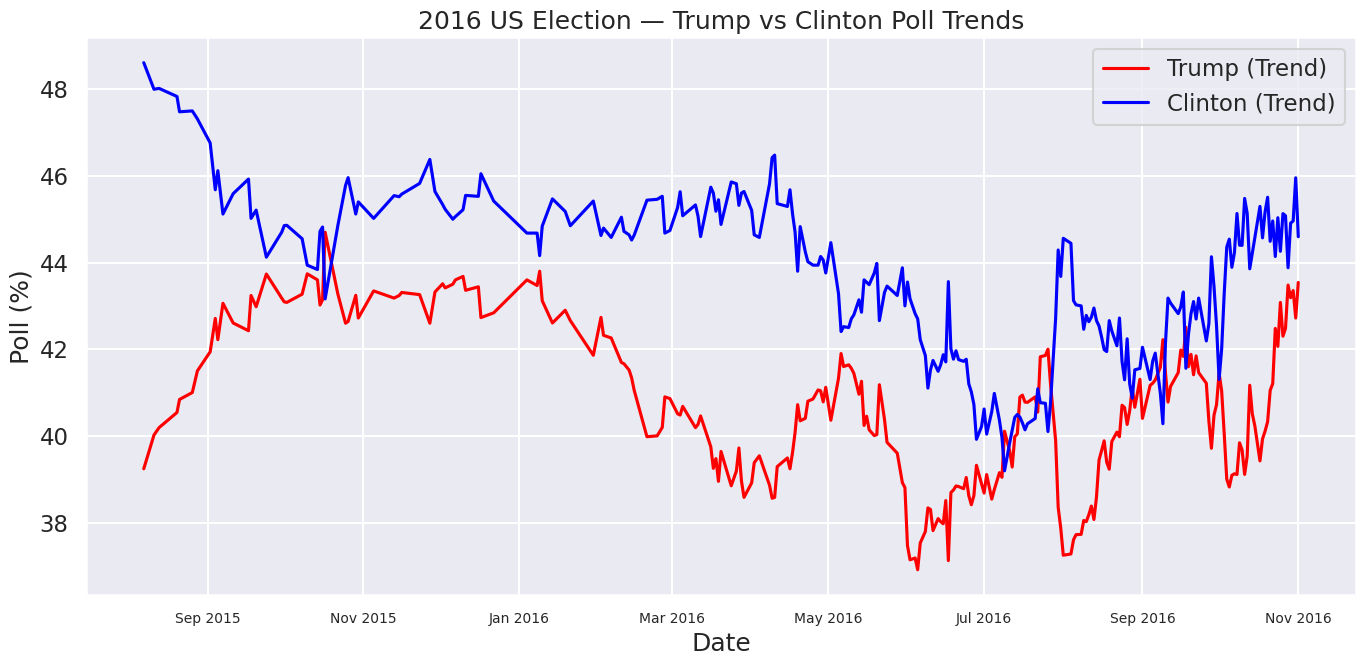

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set_theme(style="darkgrid", context="talk")

df["Start Date"] = pd.to_datetime(df["Start Date"])
df = df.sort_values(by="Start Date")

# Moving Average برای نمودار نرم‌تر
df["Trump_Smooth"] = df["Trump"].rolling(window=50, center=True).mean()
df["Clinton_Smooth"] = df["Clinton"].rolling(window=50, center=True).mean()

plt.figure(figsize=(14, 7))


# خطوط روند
sns.lineplot(x=df["Start Date"], y=df["Trump_Smooth"], color="red", label="Trump (Trend)" , errorbar=None)
sns.lineplot(x=df["Start Date"], y=df["Clinton_Smooth"], color="blue", label="Clinton (Trend)" , errorbar=None)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.ylabel("Poll (%)")
plt.xlabel("Date")
plt.title("2016 US Election — Trump vs Clinton Poll Trends")
plt.xticks(fontsize=10, rotation=0)
ax = plt.gca()

plt.tight_layout()
plt.show()


## E) Total Sample Size

In [27]:
total_voters = df["Number of Observations"].sum()
print(f"Total Number of Voters: {total_voters}")


Total Number of Voters: 1940931.0


## F) Aggregate Proportions

In [28]:
df["Clinton Votes"] = (df["Clinton"] / 100) * df["Number of Observations"]
df["Trump Votes"] = (df["Trump"] / 100) * df["Number of Observations"]

total_clinton_votes = df["Clinton Votes"].sum()
total_trump_votes = df["Trump Votes"].sum()

p_hat_clinton = total_clinton_votes / total_voters
p_hat_trump = total_trump_votes / total_voters

result = pd.DataFrame({
    'Candidate': ['Clinton', 'Trump'],
    'Estimated Proportion': [p_hat_clinton, p_hat_trump]
})

print(result)

  Candidate  Estimated Proportion
0   Clinton              0.456121
1     Trump              0.405834


## G) Confidence Intervals for Both Candidates

In [29]:
total_clinton_votes = df["Clinton Votes"].sum()
total_trump_votes = df["Trump Votes"].sum()

p_hat_clinton = total_clinton_votes / total_voters
p_hat_trump = total_trump_votes / total_voters

SE_clinton = np.sqrt((p_hat_clinton * (1 - p_hat_clinton)) / total_voters)
SE_trump = np.sqrt((p_hat_trump * (1 - p_hat_trump)) / total_voters)

z_score = 1.96
CI_clinton_lower = p_hat_clinton - z_score * SE_clinton
CI_clinton_upper = p_hat_clinton + z_score * SE_clinton

CI_trump_lower = p_hat_trump - z_score * SE_trump
CI_trump_upper = p_hat_trump + z_score * SE_trump

result = pd.DataFrame({
    'Candidate': ['Clinton', 'Trump'],
    'Estimated Proportion': [p_hat_clinton, p_hat_trump],
    '95% CI Lower': [CI_clinton_lower, CI_trump_lower],
    '95% CI Upper': [CI_clinton_upper, CI_trump_upper]
})

print(result)

  Candidate  Estimated Proportion  95% CI Lower  95% CI Upper
0   Clinton              0.456121      0.455420      0.456822
1     Trump              0.405834      0.405143      0.406524
